In [27]:
import os

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [10]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.visualization import raster_plot

### Get sessions data

Sessions are already loaded on local drive.

In [3]:
# cache directory path, it determines where downloaded data will be stored
output_dir = '/ecephys_cache_dir/'
manifest_path = os.path.join(output_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
print(cache.get_all_session_types())

# functional connecivity dataset contains 30 min spontaneous activity block
sessions = cache.get_session_table()
print('len sessions: {}'.format(len(sessions)))

brain_observatory_type_sessions = sessions[sessions["session_type"] == "functional_connectivity"]
print('len brain_observatory_type_sessions = functional_connectivity: {}'.format(len(brain_observatory_type_sessions)))
print(brain_observatory_type_sessions.keys())

brain_observatory_type_sessions.tail(3)

['brain_observatory_1.1', 'functional_connectivity']
len sessions: 58
len brain_observatory_type_sessions = functional_connectivity: 26
Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
839557629,2019-10-03T00:00:00Z,821469666,functional_connectivity,115.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,450,1853,5,"[APN, NOT, MB, DG, CA1, VISam, nan, VISpm, LGd..."
840012044,2019-10-03T00:00:00Z,820866121,functional_connectivity,116.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,758,2298,6,"[APN, DG, CA1, VISam, nan, LP, VISpm, VISp, LG..."
847657808,2019-10-03T00:00:00Z,827809884,functional_connectivity,126.0,F,wt/wt,874,2298,6,"[APN, NOT, DG, HPF, ProS, CA1, VISam, nan, MB,..."


In [ ]:
# By default, the AllenSDK applies filters so only units above a set of thresholds are returned.
# The default filter values are as follows:

# isi_violations < 0.5
# amplitude_cutoff < 0.1
# presence_ratio > 0.9
# units = cache.get_units()

# units = cache.get_units(amplitude_cutoff_maximum = np.inf,
#                         presence_ratio_minimum = -np.inf,
#                         isi_violations_maximum = np.inf)
# print(units.keys())
# len(units)

# units.query('session_type == "functional_connectivity"')
# units['genotype'].unique()

In [ ]:
# # load all sessions to local drive 
# for session_id, row in brain_observatory_type_sessions.iterrows():

#     truncated_file = True
#     directory = os.path.join(output_dir + '/session_' + str(session_id))

#     while truncated_file:
#         session = cache.get_session_data(session_id)
#         try:
#             print(session.specimen_name)
#             truncated_file = False
#         except OSError:
#             shutil.rmtree(directory)
#             print(" Truncated spikes file, re-downloading")

### Get single units 

using 30 min of spontaneous activity (animals were shown grey screen)

**todo:**  figure out quality cutoffs;
for explanation why low amplitude cutoff is good for ITs 
see also https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html#Amplitude-cutoff
the idea is to get units that are more "complete", 0.01 means 1% of spikes is missing from the units

In [4]:
brain_observatory_type_sessions.index.values

array([766640955, 767871931, 768515987, 771160300, 771990200, 774875821,
       778240327, 778998620, 779839471, 781842082, 786091066, 787025148,
       789848216, 793224716, 794812542, 816200189, 819186360, 819701982,
       821695405, 829720705, 831882777, 835479236, 839068429, 839557629,
       840012044, 847657808], dtype=int64)

In [5]:
session_id_ = brain_observatory_type_sessions.index.values[0]
print('processing session {}'.format(session_id_))

brain_observatory_type_sessions.loc[session_id_,:]

processing session 766640955


published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           744912849
session_type                                            functional_connectivity
age_in_days                                                               133.0
sex                                                                           M
full_genotype                                                             wt/wt
unit_count                                                                  842
channel_count                                                              2233
probe_count                                                                   6
ecephys_structure_acronyms    [MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP...
Name: 766640955, dtype: object

In [6]:
session_ = cache.get_session_data(session_id_)
units = session_.units
print(len(units))
print(units.keys())

C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 be

842
Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')


In [7]:
print(session_.stimulus_names)
presentations_ = session_.get_stimulus_table("spontaneous")
presentations_

C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\ipochino\.conda\envs\allensdk2\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


['spontaneous', 'gabors', 'flashes', 'drifting_gratings_contrast', 'natural_movie_one_more_repeats', 'natural_movie_one_shuffled', 'drifting_gratings_75_repeats', 'dot_motion']


,start_time,stop_time,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,
0,15.289644,75.356384,spontaneous,60.066740,0
3646,987.351691,1276.359894,spontaneous,289.008203,0
3797,1574.859290,1636.660934,spontaneous,61.801644,0
4338,2176.612116,2297.212884,spontaneous,120.600769,0
40639,4397.968317,6200.474424,spontaneous,1802.506107,0
40940,7100.226217,7101.227054,spontaneous,1.000837,0


In [8]:
# todo find stimulus_presentation_id, use duration? 
spikes_df = session_.presentationwise_spike_times(
    stimulus_presentation_ids=40639,  
    unit_ids=units.index.values
)

In [9]:
spikes_df

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
4397.968838,40639,950919460,0.000521
4397.969123,40639,950934657,0.000806
4397.969223,40639,950935725,0.000906
4397.969356,40639,950928545,0.001039
4397.969573,40639,950949803,0.001256
...,...,...,...
6200.473838,40639,950914701,1802.505521
6200.474019,40639,950923442,1802.505702
6200.474084,40639,950922307,1802.505767


In [18]:
spikes_df['spike_time_str'] = spikes_df.index.astype(str)
spikes_df

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset,spike_time_str
spike_time,,,,
4397.968838,40639,950919460,0.000521,4397.96883773954
4397.969123,40639,950934657,0.000806,4397.969122841402
4397.969223,40639,950935725,0.000906,4397.9692228416725
4397.969356,40639,950928545,0.001039,4397.9693557294
4397.969573,40639,950949803,0.001256,4397.969572680832
...,...,...,...,...
6200.473838,40639,950914701,1802.505521,6200.473837809637
6200.474019,40639,950923442,1802.505702,6200.474018799133
6200.474084,40639,950922307,1802.505767,6200.474084304526


In [22]:
spikes_out = spikes_df.groupby(by='unit_id', as_index=False).agg(spike_times=('spike_time_str', ','.join))

In [23]:
spikes_out

,unit_id,spike_times
0,950911624,"4398.1323119399585,4398.4390789287445,4399.246..."
1,950911641,"4397.993711794423,4398.114845254951,4398.25981..."
2,950911657,"4397.989845123696,4398.121045261461,4398.24907..."
3,950911686,"4398.047511850915,4398.052111855745,4398.05544..."
4,950911696,"4398.039045175358,4398.104345243926,4398.18271..."
...,...,...
837,950950928,"4400.753669087679,4402.903799646054,4403.09256..."
838,950950976,"4398.255072312367,4398.30433891545,4398.306738..."
839,950951230,"4397.9868393252145,4398.09267252196,4398.09513..."
840,950951241,"4398.89040482574,4399.330870923942,4399.477504..."


In [24]:
units[['ecephys_structure_acronym']]

,ecephys_structure_acronym
unit_id,
950911624,MB
950911641,MB
950911686,MB
950911657,MB
950911696,MB
...,...
950950813,VISrl
950950915,VISrl
950950901,VISrl


In [64]:
spikes_out_dict = spikes_out.to_dict(orient='index')
spikes_out_dict[0]

{'unit_id': 950911624,
 'spike_times': '4398.1323119399585,4398.4390789287445,4399.246813110233,4399.618446833798,4399.853480413927,4399.964213863535,4400.258714172773,4400.329780914063,4400.63751457053,4401.475882117518,4401.711349031436,4402.444483134592,4402.931216979016,4403.011117062914,4403.3045840377345,4403.380617450906,4403.51285092309,4403.541784286805,4403.758051180561,4403.910251340378,4404.167751610764,4404.290018405816,4404.415351870755,4404.669552137677,4404.997185815039,4405.05681921099,4405.106085929389,4405.168285994702,4405.200786028829,4405.307619474342,4405.399186237157,4405.445419619037,4405.500686343737,4405.612819794815,4405.648319832091,4405.804419996003,4405.960153492863,4406.040786910866,4406.138687013665,4406.192653736999,4406.254920469049,4406.439187329203,4406.638954205633,4406.7129876167055,4406.778021018326,4406.931321179298,4407.066087987476,4407.151821410833,4407.224154820119,4407.264854862856,4407.291154890472,4407.34205494392,4407.38848832601,4407.44

In [65]:
verbose = False
output_filename_ = 'Q:\\Personal\\Irina\\projects\\isttc\\' + 'allen_test_one_session_' + str(session_id_) + '.csv'
with open(output_filename_, 'a', newline='') as f:
    writer = csv.writer(f)
    for k,v in spikes_out_dict.items():
        if verbose:
            print('Writing unit {}'.format(v['unit_id']))
        #    spikes_l = spike_train.tolist()
        row = [v['unit_id']] + list(map(float, v['spike_times'].split(',')))
        writer.writerow(row)

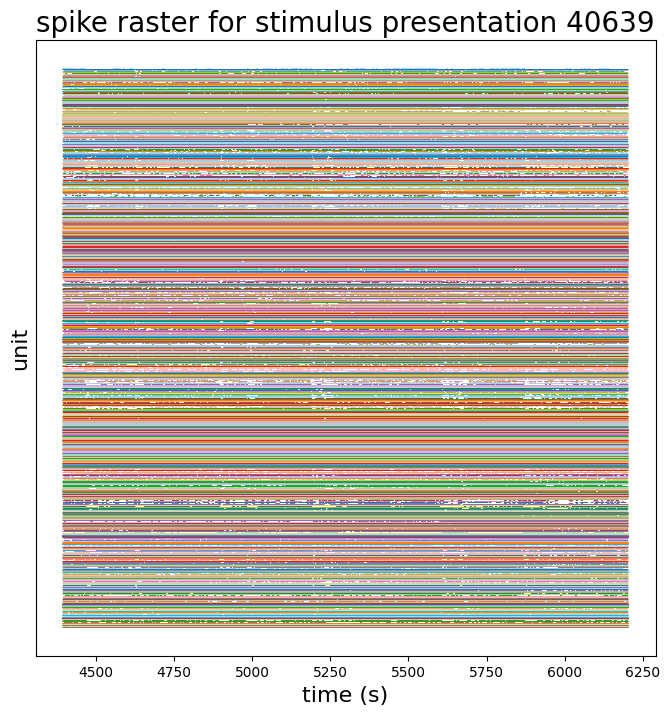

NameError: name 'session' is not defined

In [11]:
spont_30min_presentation_id = spikes_df['stimulus_presentation_id'].values[0]
plot_times = spikes_df[spikes_df['stimulus_presentation_id'] == spont_30min_presentation_id]

fig = raster_plot(plot_times, title=f'spike raster for stimulus presentation {spont_30min_presentation_id}')
plt.show()

# also print out this presentation
session_.stimulus_presentations.loc[spont_30min_presentation_id]

In [ ]:
# #presentations = session.get_stimulus_table("spontaneous")
# units = session.units[session.units["ecephys_structure_acronym"] == 'VISl']

# time_step = 10.0
# time_bins = np.arange(0, 1800 + time_step, time_step)

# histograms = session.presentationwise_spike_counts(
#     stimulus_presentation_ids=40639,  
#     bin_edges=time_bins,
#     unit_ids=units.index.values
# )

# histograms.coords

In [ ]:
# mean_histograms = histograms.mean(dim="stimulus_presentation_id")

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.pcolormesh(
#     mean_histograms["time_relative_to_stimulus_onset"], 
#     np.arange(mean_histograms["unit_id"].size),
#     mean_histograms.T
#     # vmin=0,
#     # vmax=1
# )

# ax.set_ylabel("unit")
# ax.set_xlabel("time (s)")
